In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

In [2]:
df=pd.read_csv("TATAMOTORS.NS.csv",na_values=["null"],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-10,400.000000,408.500000,389.600006,391.750000,391.750000,16540303
2022-05-11,396.000000,397.000000,377.549988,388.149994,388.149994,29215175
2022-05-12,382.000000,384.649994,366.200012,372.299988,372.299988,33511538
2022-05-13,387.000000,419.350006,387.000000,404.299988,404.299988,71425747
2022-05-16,411.899994,411.899994,396.250000,405.350006,405.350006,24938704


In [3]:
df.shape
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
df.size

1494

In [5]:
df.cov()

,Open,High,Low,Close,Adj Close,Volume
Open,6.791176e+02,6.774624e+02,6.765397e+02,6.772151e+02,6.772151e+02,-3.409517e+07
High,6.774624e+02,6.973059e+02,6.863482e+02,7.005216e+02,7.005216e+02,-1.084302e+07
Low,6.765397e+02,6.863482e+02,6.962894e+02,6.996290e+02,6.996290e+02,-3.787751e+07
Close,6.772151e+02,7.005216e+02,6.996290e+02,7.192686e+02,7.192686e+02,-2.006950e+07
Adj Close,6.772151e+02,7.005216e+02,6.996290e+02,7.192686e+02,7.192686e+02,-2.006950e+07
Volume,-3.409517e+07,-1.084302e+07,-3.787751e+07,-2.006950e+07,-2.006950e+07,7.456855e+13


<AxesSubplot:xlabel='Date'>

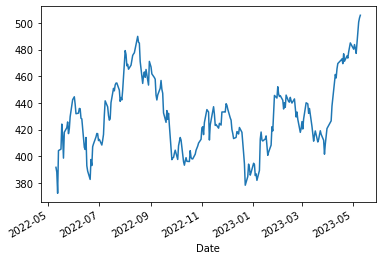

In [6]:
df['Adj Close'].plot()

In [7]:
output_var = pd.DataFrame(df[r'Adj Close'])

In [8]:
features = ['Open', 'High', 'Low', 'Volume']

In [9]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2022-05-10,0.154599,0.185965,0.169381,0.199390
2022-05-11,0.123288,0.096296,0.082157,0.384278
2022-05-12,0.013699,0.000000,0.000000,0.446948
2022-05-13,0.052838,0.270565,0.150561,1.000000
2022-05-16,0.247749,0.212476,0.217517,0.321897


In [11]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [12]:
X_train.head()

,Open,High,Low,Volume
Date,,,,
2022-05-10,0.154599,0.185965,0.169381,0.199390
2022-05-11,0.123288,0.096296,0.082157,0.384278
2022-05-12,0.013699,0.000000,0.000000,0.446948
2022-05-13,0.052838,0.270565,0.150561,1.000000
2022-05-16,0.247749,0.212476,0.217517,0.321897


In [13]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1]) 

In [43]:
lstm = Sequential()
lstm.add(LSTM(64, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=True))
lstm.add(LSTM(32, activation='relu'))
lstm.add(Dense(1))

lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True) 

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [44]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=4, verbose=1, shuffle=False)

Epoch 1/100
57/57 [==============================] - 2s 2ms/step - loss: 181520.2812
Epoch 2/100
57/57 [==============================] - 0s 3ms/step - loss: 181189.3750
Epoch 3/100
57/57 [==============================] - 0s 3ms/step - loss: 178226.9062
Epoch 4/100
57/57 [==============================] - 0s 3ms/step - loss: 166164.0938
Epoch 5/100
57/57 [==============================] - 0s 3ms/step - loss: 141263.9531
Epoch 6/100
57/57 [==============================] - 0s 3ms/step - loss: 102777.0391
Epoch 7/100
57/57 [==============================] - 0s 3ms/step - loss: 58777.9023
Epoch 8/100
57/57 [==============================] - 0s 3ms/step - loss: 26153.6172
Epoch 9/100
57/57 [==============================] - 0s 2ms/step - loss: 13563.4336
Epoch 10/100
57/57 [==============================] - 0s 2ms/step - loss: 11513.0107
Epoch 11/100
57/57 [==============================] - 0s 2ms/step - loss: 11120.9277
Epoch 12/100
57/57 [==============================] - 0s 2ms/step - 

In [45]:
y_pred= lstm.predict(X_test)

1/1 [==============================] - 0s 289ms/step


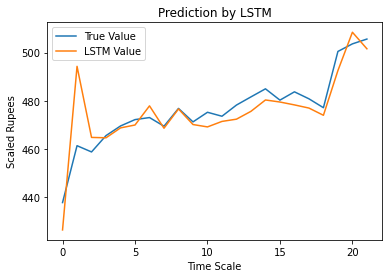

In [46]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled Rupees')
plt.legend()
plt.show()


In [28]:
mse = np.mean(np.square(y_test - y_pred))
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

In [29]:
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2): ", r2)


Mean Squared Error (MSE):  442.3882222299816
Root Mean Squared Error (RMSE):  21.03302693931574
R-squared (R2):  [0.96427729]


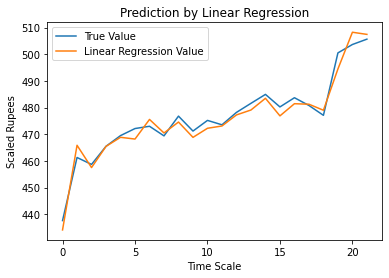

In [30]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='Linear Regression Value')
plt.title("Prediction by Linear Regression")
plt.xlabel('Time Scale')
plt.ylabel('Scaled Rupees')
plt.legend()
plt.show()
